In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.model_selection import train_test_split
sns.set()
import pylab
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif


In [2]:
df=pd.read_csv("C:\\Users\\yashw\\Downloads\\car data.csv")

In [3]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df['Car_Age']=df['Year'].apply(lambda x:2022-x)

In [5]:
df=df.drop(columns='Year')

In [6]:
df

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,8
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,6
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,7
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,13
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,5


In [7]:
df.isnull().sum()

Car_Name         0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Car_Age          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   Car_Age        301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
df.groupby(['Transmission'])['Car_Name'].nunique()

Transmission
Automatic    23
Manual       88
Name: Car_Name, dtype: int64

In [10]:
df.groupby(['Transmission'])['Car_Name'].value_counts()

Transmission  Car_Name     
Automatic     fortuner         9
              innova           4
              ciaz             3
              corolla altis    3
              Activa 3g        2
                              ..
Manual        ignis            1
              land cruiser     1
              omni             1
              s cross          1
              vitara brezza    1
Name: Car_Name, Length: 111, dtype: int64

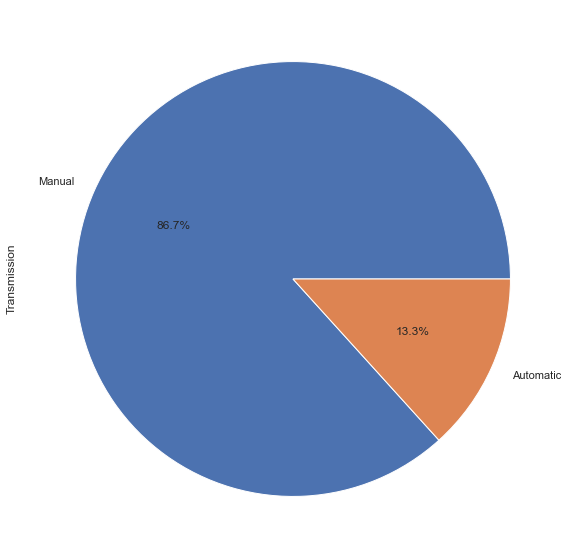

In [11]:
plt.figure(figsize=(10,10))
qe=df['Transmission'].value_counts()
qe.plot.pie(autopct="%.1f%%");

In [12]:
df.groupby(['Transmission'])['Fuel_Type'].value_counts()

Transmission  Fuel_Type
Automatic     Petrol        28
              Diesel        12
Manual        Petrol       211
              Diesel        48
              CNG            2
Name: Fuel_Type, dtype: int64

In [13]:
df.groupby(['Transmission'])['Fuel_Type'].nunique()

Transmission
Automatic    2
Manual       3
Name: Fuel_Type, dtype: int64

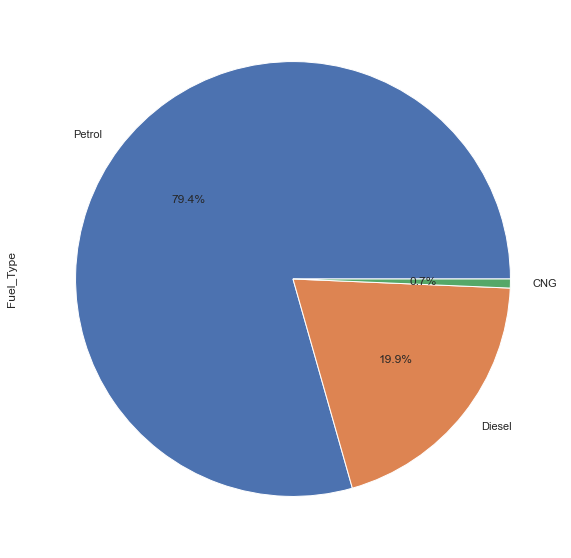

In [14]:
plt.figure(figsize=(10,10))
qe=df['Fuel_Type'].value_counts()
qe.plot.pie(autopct="%.1f%%");

In [15]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

C:\Users\yashw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

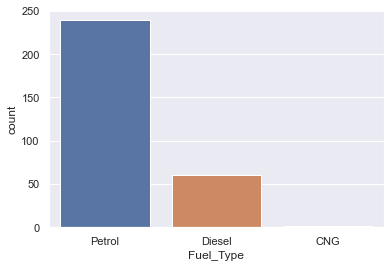

In [16]:
sns.countplot(df['Fuel_Type'])

In [17]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104
Car_Age,-0.236141,0.047584,0.524342,0.182104,1.000000


<AxesSubplot:>

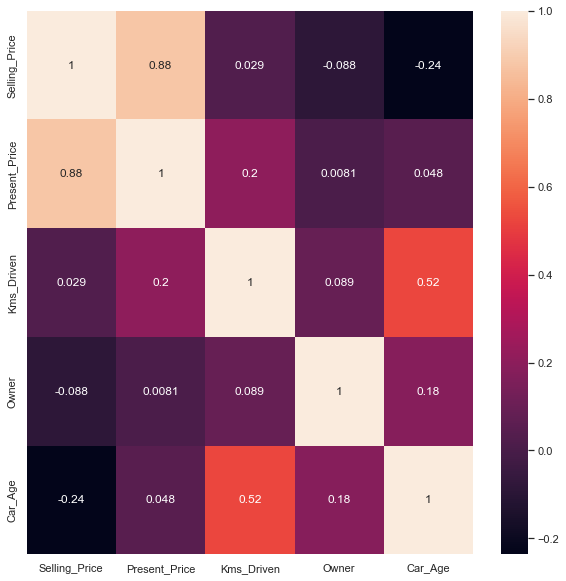

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [19]:
df=pd.get_dummies(df,columns=['Fuel_Type','Seller_Type','Transmission'])

In [20]:
df=df.drop(columns='Car_Name')

In [21]:
df

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,8,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,9,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,5,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,11,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,8,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,6,0,1,0,1,0,0,1
297,4.00,5.90,60000,0,7,0,0,1,1,0,0,1
298,3.35,11.00,87934,0,13,0,0,1,1,0,0,1
299,11.50,12.50,9000,0,5,0,1,0,1,0,0,1


In [22]:
X=df.drop(columns='Selling_Price')
Y=df[['Selling_Price']]

In [23]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.25,random_state=1200)

In [25]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
# print intercept and coefficients(slope)
print(lm.intercept_)
print(lm.coef_)

[4.6208736]
[[ 3.59193381 -0.15413482 -0.23004955 -1.22553605 -0.13164064  0.41670888
  -0.38519917  0.30592195 -0.30592195  0.19953926 -0.19953926]]


In [26]:
lm.score(x_test,y_test)

0.850854106468987

In [27]:
def adj_r2(x,y):
    r2=lm.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [28]:
adj_r2(x_test,y_test)

0.8252196560183441

In [29]:
y_pred=lm.predict(x_test)

In [30]:
print('MSE: ',mean_squared_error(y_test,y_pred))
print('MAPE: ',mean_absolute_percentage_error(y_test, y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))

MSE:  3.900665939793398
MAPE:  1.1224355413480236
MAE:  1.1963868769045587


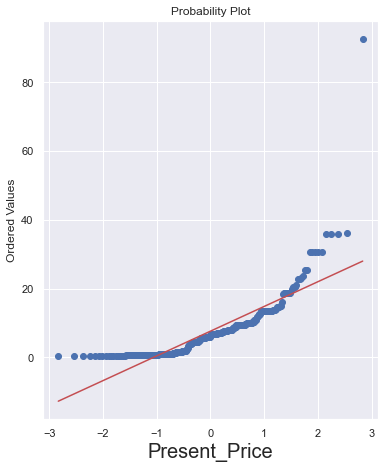

In [31]:
plt.figure(figsize=(20,25),facecolor='white')
a=1
for i in X:
    if(a<=1):
        ax=plt.subplot(4,4,a)
        stats.probplot(df[i],dist='norm',plot=pylab)        
        plt.xlabel(i,fontsize=20)
    a=a+1
plt.tight_layout()    
        

In [32]:
lm = smf.ols(formula='Selling_Price ~ Present_Price + Kms_Driven + Owner +Car_Age + Fuel_Type_CNG + Fuel_Type_Diesel + Fuel_Type_Petrol + Seller_Type_Dealer + Seller_Type_Individual + Transmission_Automatic + Transmission_Manual', data=df).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     274.3
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          5.71e-131
Time:                        15:30:26   Log-Likelihood:                -593.62
No. Observations:                 301   AIC:                             1205.
Df Residuals:                     292   BIC:                             1239.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2.2810      0.239      9.535      0.000       1.810       2.752
Present_Price              0.4372      0.016     27.355      0.000       0.406       0.469
Kms_Driven             -7.013e-06   3.23e-06     -2.172      0.031   -1.34e-05   -6.57e-07
Owner                     -0.6742      0.423     -1.595      0.112      -1.506       0.158
Car_Age                   -0.3931      0.043     -9.159      0.000      -0.478      -0.309
Fuel_Type_CNG             -0.2655      0.900     -0.295      0.768      -2.037       1.506
Fuel_Type_Diesel           2.2044      0.409      5.389      0.000       1.399       3.010
Fuel_Type_Petrol           0.3421      0.379      0.902      0.368      -0.404       1.089
Seller_Type_Dealer         1.7012      0.172      9.913      0.000       1.363       2.039
Seller_Type_Individual     0.5799      0.179      3.238      0.001       0.227       0.932
Transmission_Automatic     1.8646      0.227      8.201      0.000       1.417       2.312
Transmission_Manual        0.4164      0.175      2.378      0.018       0.072       0.761
==============================================================================
Omnibus:                       95.107   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              696.392
Skew:                           1.075   Prob(JB):                    6.03e-152
Kurtosis:                      10.135   Cond. No.                     1.55e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.59e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [33]:
df=df.drop(columns=['Owner','Fuel_Type_CNG','Fuel_Type_Petrol'])

In [34]:
lm = smf.ols(formula='Selling_Price ~ Present_Price + Kms_Driven +Car_Age  + Fuel_Type_Diesel +  Seller_Type_Dealer + Seller_Type_Individual + Transmission_Automatic + Transmission_Manual', data=df).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     364.4
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          6.18e-133
Time:                        15:30:26   Log-Likelihood:                -595.04
No. Observations:                 301   AIC:                             1204.
Df Residuals:                     294   BIC:                             1230.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2.4755      0.181     13.666      0.000       2.119       2.832
Present_Price              0.4358      0.016     27.287      0.000       0.404       0.467
Kms_Driven             -7.026e-06   3.23e-06     -2.173      0.031   -1.34e-05   -6.63e-07
Car_Age                   -0.4032      0.043     -9.482      0.000      -0.487      -0.319
Fuel_Type_Diesel           1.8827      0.299      6.302      0.000       1.295       2.471
Seller_Type_Dealer         1.8195      0.159     11.416      0.000       1.506       2.133
Seller_Type_Individual     0.6560      0.152      4.303      0.000       0.356       0.956
Transmission_Automatic     1.9550      0.214      9.119      0.000       1.533       2.377
Transmission_Manual        0.5206      0.156      3.343      0.001       0.214       0.827
==============================================================================
Omnibus:                       93.228   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              692.402
Skew:                           1.043   Prob(JB):                    4.43e-151
Kurtosis:                      10.131   Cond. No.                     7.73e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.45e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [35]:
X=df.drop(columns='Selling_Price')
Y=df[['Selling_Price']]

In [36]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [37]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.25,random_state=1200)

In [38]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
# print intercept and coefficients(slope)
print(lm.intercept_)
print(lm.coef_)

[4.62310265]
[[ 3.56934941 -0.15835943 -1.26479339  0.80956827  0.31870523 -0.31870523
   0.19451166 -0.19451166]]


In [39]:
lm.score(x_test,y_test)

0.8532292977785717

In [40]:
def adj_r2(x,y):
    r2=lm.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [41]:
adj_r2(x_test,y_test)

0.835704437811834

In [42]:
y_pred=lm.predict(x_test)

In [43]:
print('MSE: ',mean_squared_error(y_test,y_pred))
print('MAPE: ',mean_absolute_percentage_error(y_test, y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))

MSE:  3.8385467112819924
MAPE:  0.957262904493302
MAE:  1.1612798491079817


In [44]:
variables = X_scaled
Vif =pd.DataFrame()
Vif['Vif'] = [vif(variables,i) for i in range(variables.shape[1])]
Vif['Features'] = X.columns

C:\Users\yashw\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [45]:
Vif

,Vif,Features
0,1.829711,Present_Price
1,1.517597,Kms_Driven
2,1.451122,Car_Age
3,1.372234,Fuel_Type_Diesel
4,inf,Seller_Type_Dealer
5,inf,Seller_Type_Individual
6,inf,Transmission_Automatic
7,inf,Transmission_Manual


In [46]:
df=df.drop(columns=['Seller_Type_Dealer','Seller_Type_Individual','Transmission_Automatic','Transmission_Manual'])

In [47]:
df

,Selling_Price,Present_Price,Kms_Driven,Car_Age,Fuel_Type_Diesel
0,3.35,5.59,27000,8,0
1,4.75,9.54,43000,9,1
2,7.25,9.85,6900,5,0
3,2.85,4.15,5200,11,0
4,4.60,6.87,42450,8,1
...,...,...,...,...,...
296,9.50,11.60,33988,6,1
297,4.00,5.90,60000,7,0
298,3.35,11.00,87934,13,0
299,11.50,12.50,9000,5,1


In [57]:
X=df.drop(columns='Selling_Price')
Y=df[['Selling_Price']]

In [58]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [59]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.25,random_state=1200)

In [60]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
# print intercept and coefficients(slope)
print(lm.intercept_)
print(lm.coef_)

[4.61602977]
[[ 3.9452008  -0.08704586 -1.32651642  0.86991218]]


In [61]:
lm.score(x_test,y_test)

0.8411690371632903

In [62]:
def adj_r2(x,y):
    r2=lm.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [63]:
adj_r2(x_test,y_test)

0.8322208139048841

In [64]:
y_pred=lm.predict(x_test)

In [65]:
print('MSE: ',mean_squared_error(y_test,y_pred))
print('MAPE: ',mean_absolute_percentage_error(y_test, y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))

MSE:  4.153963024083645
MAPE:  1.0047575203250956
MAE:  1.302886081401464


In [66]:
variables = X_scaled
Vif =pd.DataFrame()
Vif['Vif'] = [vif(variables,i) for i in range(variables.shape[1])]
Vif['Features'] = X.columns

In [67]:
Vif

,Vif,Features
0,1.314962,Present_Price
1,1.483608,Kms_Driven
2,1.428111,Car_Age
3,1.338104,Fuel_Type_Diesel
